In [70]:
import numpy as np
import matplotlib.pyplot as plt
import math

SMALL_SIZE = 10
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [13]:
i = 8
name = 'T_' + str(i) + '_'
t = np.genfromtxt(name+'times.txt')
x = np.genfromtxt(name+'x.txt')
sigma_x = np.genfromtxt(name+'sigma_x.txt')
p = np.genfromtxt(name+'p.txt')
sigma_p =  np.genfromtxt(name+'sigma_p.txt')

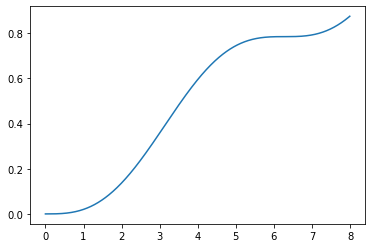

In [14]:
plt.plot(t, x)

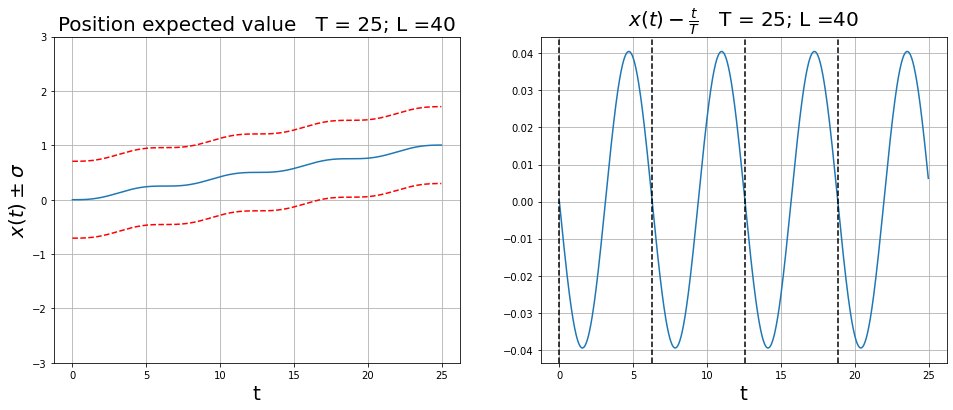

In [88]:
T = 25

L = 40
Nx = 12000
Nt = 1000

name = 'T_' + str(T) + '_'
t = np.genfromtxt(name+'times.txt')
x = np.genfromtxt(name+'x.txt')
sigma_x = np.genfromtxt(name+'sigma_x.txt')
p = np.genfromtxt(name+'p.txt')
sigma_p =  np.genfromtxt(name+'sigma_p.txt')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

ax1.set_ylim([-3,3])
ax1.plot(t, x)
ax1.plot(t, x+sigma_x, 'r--')
ax1.plot(t, x-sigma_x, 'r--')
ax1.set_title('Position expected value' + '   T = ' + str(T) + '; L =' + str(L))
ax1.grid(True)
ax1.set_xlabel('t')
ax1.set_ylabel(r'$x(t) \pm \sigma$')

# (q-t/T) = x at frozen time t should oscillate ( I have an harmonic oscillator): 
# you have the expected value of q, plot <q> - t/T

oscillating = x - t/T

#period 2pi/w but w=1: plot vertical lines
pis =2 * np.pi * np.arange(int(math.ceil( T /(2 * np.pi))))

ax2.plot(t, oscillating)

for vertical in pis:
    ax2.axvline(vertical, color="black", linestyle="--")

ax2.set_title(r'$x(t) - \frac{t}{T}$' + '   T = ' + str(T) + '; L =' + str(L))
ax2.set_xlabel('t')
ax2.grid(True)

plt.savefig("T25x")

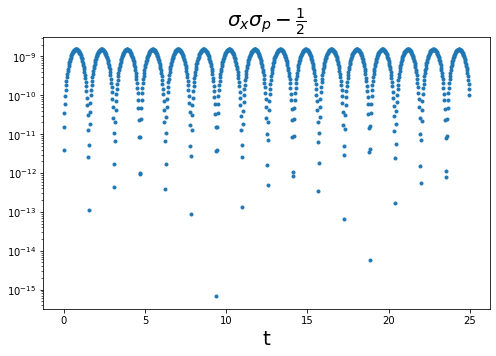

In [116]:
heisenberg = np.multiply(sigma_x, sigma_p)

fig, ax1 = plt.subplots(1,1, figsize=(8, 5))


ax1.plot(t, heisenberg-0.5, '.')
ax1.set_yscale('log')
ax1.set_title(r'$\sigma_x \sigma_p - \frac{1}{2}$')
ax1.set_xlabel('t')

plt.savefig('Heisenberg')


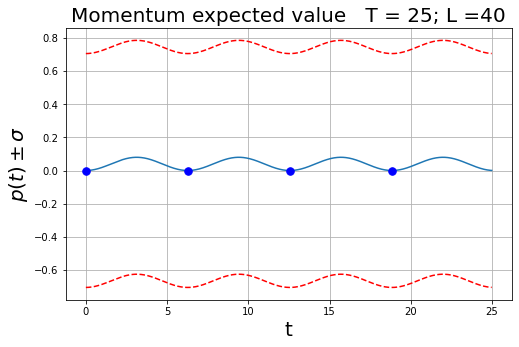

In [72]:
T = 25

L = 40
Nx = 12000
Nt = 1000

name = 'T_' + str(T) + '_'
t = np.genfromtxt(name+'times.txt')
x = np.genfromtxt(name+'x.txt')
sigma_x = np.genfromtxt(name+'sigma_x.txt')
p = np.genfromtxt(name+'p.txt')
sigma_p =  np.genfromtxt(name+'sigma_p.txt')

fig, ax1 = plt.subplots(1,1, figsize=(8, 5))


ax1.set_title('Momentum expected value' + '   T = ' + str(T) + '; L =' + str(L))
ax1.grid(True)
ax1.set_xlabel('t')
ax1.set_ylabel(r'$p(t) \pm \sigma$')
ax1.plot(t, p)
ax1.plot(t, p+sigma_p, 'r--')
ax1.plot(t, p-sigma_p, 'r--')

pis =2 * np.pi * np.arange(int(math.ceil( T /(2 * np.pi))))

for vertical in pis:
    ax1.plot(vertical, 0, 'b.', markersize = 15)

plt.savefig("T25p")

In [32]:
int(np.round( T /(2 * np.pi)))

4

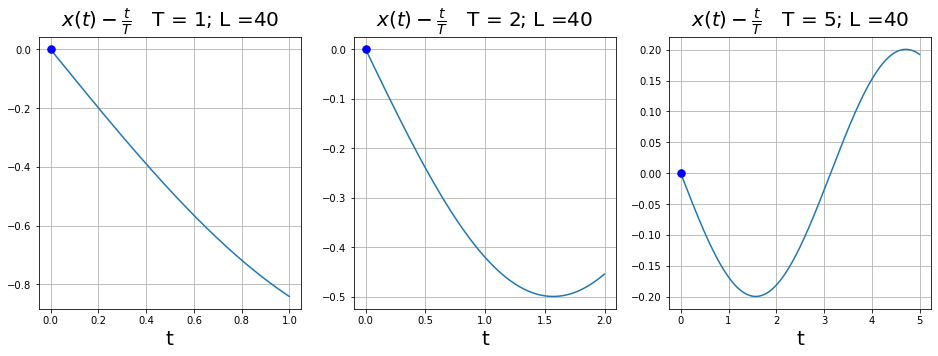

In [87]:
TT = [1, 2, 5]

fig, axes = plt.subplots(1,3, figsize=(16, 5))

c = 0

for T in TT:
    
  
    
    L = 40
    Nx = 12000
    Nt = 1000

    name = 'T_' + str(T) + '_'
    t = np.genfromtxt(name+'times.txt')
    x = np.genfromtxt(name+'x.txt')

    oscillating = x - t/T

    #period 2pi/w but w=1: plot vertical lines
    pis =2 * np.pi * np.arange(int(math.ceil( T /(2 * np.pi))))

    axes[c].plot(t, oscillating)

    for vertical in pis:
        axes[c].plot(vertical, 0, 'b.', markersize = 15)

    axes[c].set_title(r'$x(t) - \frac{t}{T}$' + '   T = ' + str(T) + '; L =' + str(L))
    axes[c].set_xlabel('t')
    axes[c].grid(True)
    c += 1

plt.savefig("125osc")

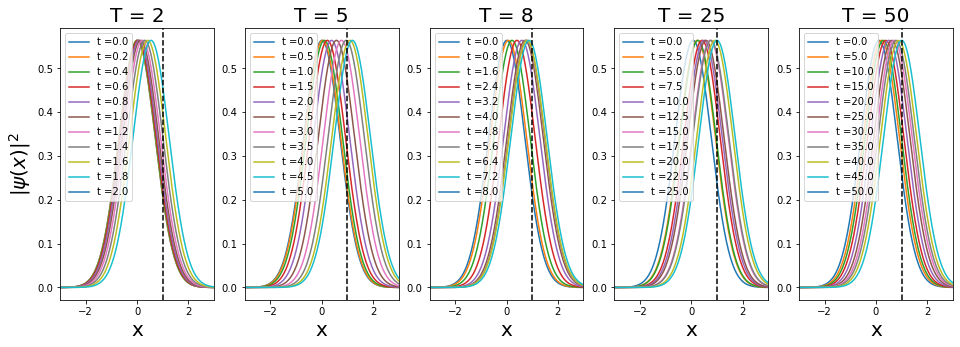

In [167]:
fig, axes = plt.subplots(1,5, figsize=(16, 5))

counter = [0, 1, 2, 3, 4]
TT = [2, 5, 8, 25, 50]
for c in counter:

    T = TT[c]
    name = 'T_' + str(T) + '_'
    t = np.genfromtxt(name+'times.txt')
    x = np.genfromtxt(name+'x.txt')

    Nx = 12000
    the_ts = np.arange(0,1001,100) * T/1000
    #first column is
    wavethings = np.genfromtxt(name+'wavex.txt' )

    for i in range(len(the_ts)):
        q = wavethings[:,0][i*Nx:(i+1)*Nx]
        wave = wavethings[:,1][i*Nx:(i+1)*Nx]

        axes[c].plot(q, wave, label = 't =' + str(the_ts[i]))

    axes[c].set_xlim([-3,3])    

    axes[c].legend()
    axes[c].set_xlabel('x')
    axes[0].set_ylabel(r'$|\psi(x)|^2$')
    axes[c].set_title('T = ' + str(TT[c]))
    
    axes[c].axvline(x = 1 , color = 'black', linestyle = '--')
    
plt.savefig("wavefunctions")

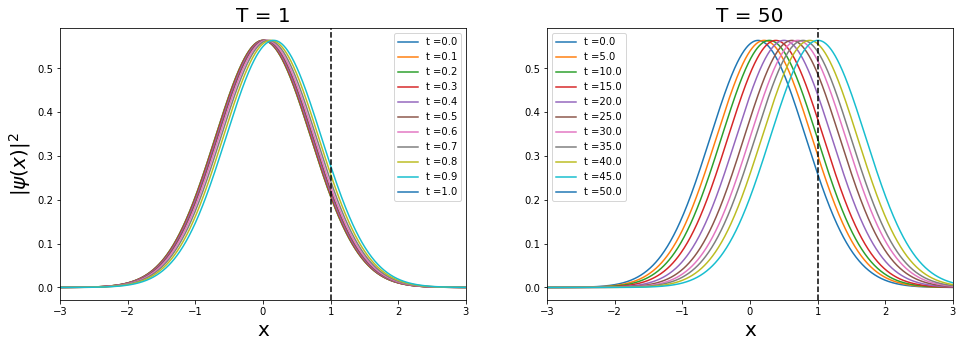

In [165]:
fig, axes = plt.subplots(1,2, figsize=(16, 5))

counter = [0, 1]
TT = [1, 50]
for c in counter:

    T = TT[c]
    name = 'T_' + str(T) + '_'
    t = np.genfromtxt(name+'times.txt')
    x = np.genfromtxt(name+'x.txt')

    Nx = 12000
    the_ts = np.arange(0,1001,100) * T/1000
    #first column is
    wavethings = np.genfromtxt(name+'wavex.txt' )

    for i in range(len(the_ts)):
        q = wavethings[:,0][i*Nx:(i+1)*Nx]
        wave = wavethings[:,1][i*Nx:(i+1)*Nx]

        axes[c].plot(q, wave, label = 't =' + str(the_ts[i]))

    axes[c].set_xlim([-3,3])    

    axes[c].legend()
    axes[c].set_xlabel('x')
    axes[0].set_ylabel(r'$|\psi(x)|^2$')
    axes[c].set_title('T = ' + str(TT[c]))
    
    axes[c].axvline(x = 1 , color = 'black', linestyle = '--')
    

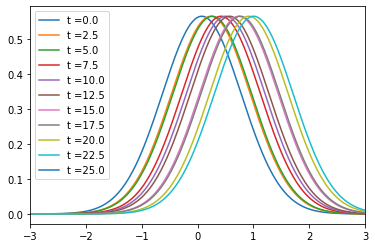

In [154]:
T = 25
name = 'T_' + str(T) + '_'
t = np.genfromtxt(name+'times.txt')
x = np.genfromtxt(name+'x.txt')

Nx = 12000
the_ts = np.arange(0,1001,100) * T/1000
#first column is
wavethings = np.genfromtxt(name+'wavex.txt' )

for i in range(len(the_ts)):
    q = wavethings[:,0][i*Nx:(i+1)*Nx]
    wave = wavethings[:,1][i*Nx:(i+1)*Nx]

    plt.plot(q, wave, label = 't =' + str(the_ts[i]))

plt.xlim([-3,3])    

plt.legend()

